NASSCOM(MINI PROJECT) ASSIGNMENT

SARAH J K

20191ISE0152

5ISE3

**MACHINE** **LEARNING**

A METHOD OF DATA ANALYSIS THAT AUTOMATES ANALYTICAL MODEL BUILDING.IT'S A TYPE OF ARTIFICIAL INTELLIGENCE THAT ALLOWS SOFTWARE APPLICATIONS TO BECOME MORE ACCURATE AT PREDICTING OUTCOMES WITHOUT BEING EXPLICITLY PROGRAMMED TO DO SO.

**SIMPLE** **LINEAR** **REGRESSION**

A REGRESSION MODEL THAT ESTIMATES THE RELATIONSHIP BETWEEN ONE INDEPENDENT VARIABLE AND ONE DEPENDENT VARIABLE USING A STRAIGHT LINE.

[y =mx+c]

where both the variables should be quantitative

**DATA** **SET**

IT'S A COLLECTION OF DATA,NUMBERS,OR VALUES THAT RELATE TO A PARTICULAR SUBJECT.

IT CAN HOLD INFORMATION SUCH AS MEDICAL RECORDS,INSURANCE RECORDS,TO BE USED BY A PROGRAM RUNNING ON THE SYSTEM. DATA SETS ARE ALSO USED TO STORE INFORMATION NEEDED BY APPLICATIONS

**DATA** **VISUALISATION**

THE PROCESS OF TRANSLATING LARGE DATA SETS AND METRICS INTO CHARTS,GRAPH,AND OTHER VISUALS WHICH IS HELPFUL TO CONDUCT ANALYSES SUCH AS PREDICTIVE ANALYSIS WHICH CAN SERVE AS HELPFUL VISUALISATION TO PRESENT

**SUPERVISED LEARNING**

THE MACHINE LEARNING TASK OF LEARNING A FUNCTION THAT MAPS AN INPUT TO AN OUTPUT BASED ON EXAMPLE INPUT-OUTPUT PAIRS. THE MODEL IS TRAINED USING 'LABELED DATA'. DATASETS ARE SAID TO CONTAIN LABELS THAT CONTAIN BOTH INPUT AND OUTPUT PARAMETERS. TO SIMPLIFY-' DATA IS ALREAY TAGGED WITH THE CORRECT ANSWER'.

**MODELS**

THOSE ARE OUTPUT BY ALGORITHMS AND ARE COMPRISED OF MODEL DATA AND A PREDICTION ALGORITHM.

**TRAINING** **MODEL**

IN SUPERVISED LEARNING, AN ML ALGORITHM BUILDS A MODEL BY EXAMINING MANY EXAMPLES AND ATTEMPTING TO FIND A MODEL THAT MINIMIZES LOSS AND IMPROVES PREDICTION ACCURACY.

**IMPORTING** **DATA** **SET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
%matplotlib inline

In [2]:
df = pd.read_csv('/data.csv') # Importing the dataset
df.sample(5) #previewing dataset 

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4365,Ford,Explorer Sport Trac,2009,regular unleaded,210.0,6.0,AUTOMATIC,four wheel drive,4.0,Crossover,Compact,Crew Cab Pickup,19,13,5657,32360
8351,Ford,Ranger,2010,regular unleaded,143.0,4.0,MANUAL,rear wheel drive,2.0,NaN,Compact,Extended Cab Pickup,27,22,5657,19515
6075,Volkswagen,Jetta SportWagen,2013,regular unleaded,170.0,5.0,AUTOMATIC,front wheel drive,4.0,NaN,Compact,Wagon,31,24,873,26195
9639,Chevrolet,Silverado 1500,2017,flex-fuel (unleaded/E85),285.0,6.0,AUTOMATIC,four wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,22,17,1385,37425
9740,Hyundai,Sonata,2016,regular unleaded,185.0,4.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,38,25,1439,21750


Then we import the car dataset. And print 5 sample dataset values. At first, we imported our necessary libraries.

In [3]:
print(df.shape) # view the dataset shape

print(df['Make'].value_counts()) # viewing Car companies with their cars number

(11914, 16)
Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             

In [4]:
df.describe( )

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**VISUALISING** **THE** **DATA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e5d180690>,
      dtype=object)

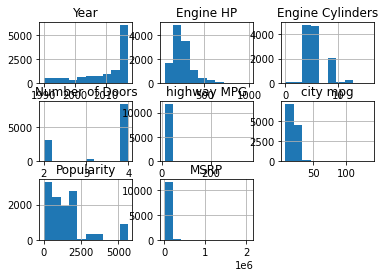

In [5]:
df.hist( )

Here we print the shape of the dataset and print the different car companies with their total cars.


In [6]:
new_df = df[df['Make']=='Volkswagen'] # in this new dataset we only take 'Volkswagen' Cars
print(new_df.shape) # Viewing the new dataset shape
print(new_df.isnull().sum()) # Is there any Null or Empty cell presents
new_df = new_df.dropna() # Deleting the rows which have Empty cells
print(new_df.shape) # After deletion Vewing the shape
print(new_df.isnull().sum()) #Is there any Null or Empty cell presents
new_df.sample(2) # Checking the random dataset sample

(809, 16)
Make                   0
Model                  0
Year                   0
Engine Fuel Type       0
Engine HP              0
Engine Cylinders       4
Transmission Type      0
Driven_Wheels          0
Number of Doors        0
Market Category      224
Vehicle Size           0
Vehicle Style          0
highway MPG            0
city mpg               0
Popularity             0
MSRP                   0
dtype: int64
(581, 16)
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5648,Volkswagen,GTI,2013,premium unleaded (recommended),200.0,4.0,MANUAL,front wheel drive,4.0,"Hatchback,Performance",Compact,4dr Hatchback,31,21,873,27295
1915,Volkswagen,Beetle,2015,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,33,25,873,21795


Here we select only ‘Volkswagen’ cars from the large dataset. Because different types of cars have different brand value and higher or lower price. So we take only one car company for better prediction. Then we view the shape and check if any null cell present or not. We found there are many null cells present. We delete those rows which have null cells. It is very important when you make a dataset for fitting any data model. Then we cross check if any null cells present or not. No null cell found then we print 5 sample dataset values.

In [7]:
new_df = new_df[['Engine HP','MSRP']] # We only take the 'Engine HP' and 'MSRP' columns
new_df.sample(5) # Checking the random dataset sample

,Engine HP,MSRP
6128,210.0,29280
5329,200.0,24300
1934,170.0,25975
10411,200.0,35565
5362,170.0,25850


Here we select only 2 specific (‘Engine HP’ and ‘MSRP’) columns from all columns. It is very important to select only those columns which could be helpful for prediction. It depends on your common sense to select those columns. Please select those columns that wouldn’t spoil your prediction. After select only 2 columns, we view our new dataset.

In [8]:
X = np.array(new_df[['Engine HP']]) # Storing into X the 'Engine HP' as np.array
y = np.array(new_df[['MSRP']]) # Storing into y the 'MSRP' as np.array
print(X.shape) # Vewing the shape of X
print(y.shape) # Vewing the shape of y

(581, 1)
(581, 1)


Here we put the ‘Engine HP’ column as a numpy array into ‘X’ variable. And ‘MSRP’ column as a numpy array into ‘y’ variable. Then check the shape of the array.

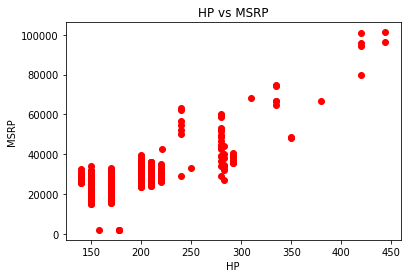

In [9]:
plt.scatter(X,y,color="red") # Plot a graph X vs y
plt.title('HP vs MSRP')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Here we plot a scatter plot graph between ‘MSRP’ and ‘HP’. After viewing this graph we ensured that we can perform a linear regression for prediction.

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=15) # Spliting into train & test dataset
regressor = LinearRegression() # Creating a regressior
regressor.fit(X_train,y_train) # Fitting the dataset into the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here we split our ‘X’ and ‘y’ dataset into ‘X_train’, ‘X_test’ and ‘y_train’, ‘y_test’. Here we take 25% data as test dataset and remaining as train dataset. We take the random_state value as 15 for our better prediction. We create regressor. And we fit the X_train and y_train into the regressor model.

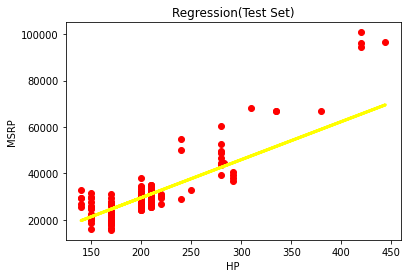

In [11]:
plt.scatter(X_test,y_test,color="red") # Plot a graph with X_test vs y_test
plt.plot(X_train,regressor.predict(X_train),color="yellow",linewidth=3) # Regressior line showing
plt.title('Regression(Test Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Here we plot a scatter plot graph between X_test and y_test datasets and we draw a regression line.

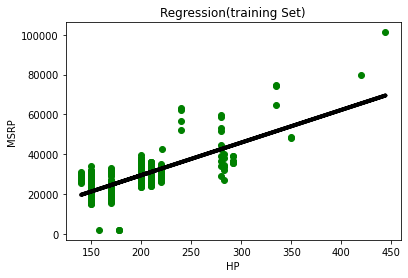

In [12]:
plt.scatter(X_train,y_train,color="green")  # Plot a graph with X_train vs y_train
plt.plot(X_train,regressor.predict(X_train),color="black",linewidth=4) # Regressior line showing
plt.title('Regression(training Set)')
plt.xlabel('HP')
plt.ylabel('MSRP')
plt.show()

Here we plot the final X_train vs y_train scatterplot graph with a best-fit regression line. Here we can clearly understand the regression line.

In [13]:
y_pred = regressor.predict(X_test)
print('R2 score: %.2f' % r2_score(y_test,y_pred)) # Printing R2 Score
print('Mean squared Error :',mean_squared_error(y_test,y_pred)) # Printing the mean error

R2 score: 0.73
Mean squared Error : 55796476.51179164


Here we create a function with the help of our trained regressor model. And we get our desired output.

In [14]:
def car_price(hp): # A function to predict the price according to Horsepower
    result = regressor.predict(np.array(hp).reshape(1, -1))
    return(result[0,0])

car_hp = int(input('Enter Volkswagen cars Horse Power : '))
print('This Volkswagen Prce will be : ',int(car_price(car_hp))*69,'₹')

Enter Volkswagen cars Horse Power : 245
This Volkswagen Prce will be :  2542650 ₹
